In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import notebook

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,
                                      transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [1]:
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [ ]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape)

torch.Size([4, 3, 32, 32])


In [ ]:
def imshow(img):
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

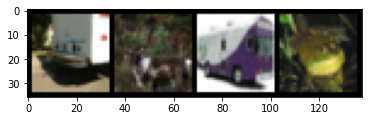

truck		deer		truck		frog


In [ ]:
imshow(torchvision.utils.make_grid(images))
print('\t\t'.join(classes[labels[j]] for j in range(4)))

# **LeNet(A convolutional neural network structure)**




In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model=nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,5),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2)
    )
    self.fc_model=nn.Sequential(
        nn.Linear(400,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )
  def forward(self,x):
    #print(x.shape)
    x=self.cnn_model(x)
    #print(x.shape)
    x=x.view(x.size(0),-1)
    #print(x.shape)
    x=self.fc_model(x)
    #print(x.shape)
    return x

In [ ]:
net=LeNet()
out=net(images)

In [ ]:
print(out)

tensor([[-0.0589, -0.1020, -0.1007, -0.1110, -0.0016, -0.0643, -0.0993,  0.0945,
         -0.1187,  0.0135],
        [-0.0593, -0.1017, -0.1052, -0.1132,  0.0036, -0.0684, -0.0977,  0.0910,
         -0.1129,  0.0203],
        [-0.0602, -0.0991, -0.1084, -0.1173,  0.0011, -0.0696, -0.1023,  0.0939,
         -0.1149,  0.0056],
        [-0.0600, -0.1037, -0.1059, -0.1136,  0.0034, -0.0699, -0.1000,  0.0899,
         -0.1159,  0.0184]], grad_fn=<AddmmBackward>)


#  **Training LeNet**

In [ ]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    outputs=net(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total

In [ ]:
net=LeNet()

In [ ]:
import torch.optim as optim
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net.parameters(),lr=0.01)

Epoch: 0/50, Test acc: 55.84, Train acc: 70.51
Epoch: 1/50, Test acc: 54.63, Train acc: 69.58
Epoch: 2/50, Test acc: 54.70, Train acc: 70.33
Epoch: 3/50, Test acc: 55.30, Train acc: 71.69
Epoch: 4/50, Test acc: 55.98, Train acc: 71.29
Epoch: 5/50, Test acc: 55.11, Train acc: 69.06
Epoch: 6/50, Test acc: 55.53, Train acc: 72.27
Epoch: 7/50, Test acc: 54.26, Train acc: 70.39
Epoch: 8/50, Test acc: 54.65, Train acc: 70.81
Epoch: 9/50, Test acc: 54.71, Train acc: 69.10
Epoch: 10/50, Test acc: 55.48, Train acc: 71.55
Epoch: 11/50, Test acc: 54.94, Train acc: 72.48
Epoch: 12/50, Test acc: 53.68, Train acc: 71.54
Epoch: 13/50, Test acc: 53.21, Train acc: 69.73
Epoch: 14/50, Test acc: 54.95, Train acc: 73.55
Epoch: 15/50, Test acc: 53.51, Train acc: 70.15
Epoch: 16/50, Test acc: 55.22, Train acc: 73.08
Epoch: 17/50, Test acc: 54.85, Train acc: 73.46
Epoch: 18/50, Test acc: 54.35, Train acc: 73.91
Epoch: 19/50, Test acc: 54.65, Train acc: 73.98
Epoch: 20/50, Test acc: 53.20, Train acc: 70.94
Ep

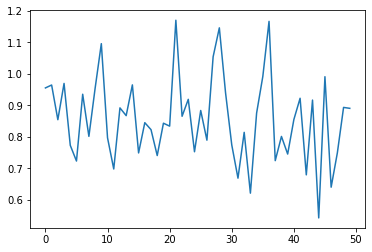

In [ ]:
loss_arr=[]
loss_epoch_arr=[]
max_epochs=50
for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    opt.zero_grad()
    outputs=net(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()